In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"F:\Capstone\Traffic_Crash.csv")

In [3]:
df.shape

(300000, 48)

In [4]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,ee0b70ab08d3cbd410c1f3ecb3c3516f8038fe8047a0d6...,NaN,06/23/2024 02:27:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,OTHER,...,0.0,0.0,2.0,0.0,14,1,6,41.864897,-87.616781,POINT (-87.616781398413 41.864897192858)
1,0ec88ab3a8569918911374c88cab3a9d2da1c3bf4a761c...,Y,02/22/2025 03:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,3,7,2,41.782577,-87.614322,POINT (-87.614322274429 41.7825765225)
2,ed6d242c683189c611132b7a13142e9fd4becaad632125...,NaN,10/27/2021 02:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,...,0.0,0.0,3.0,0.0,14,4,10,41.845306,-87.644169,POINT (-87.644168764766 41.845305788929)
3,99350589a3541909ced6cd5f09a5b4e786bd1b0c76ad5f...,NaN,07-05-2023 17:00,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,17,4,7,41.953968,-87.727479,POINT (-87.727478598828 41.953968421931)
4,b03be8f5f610db0a2a3f7002765991da0769940ba93a59...,NaN,09-11-2019 08:30,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,8,4,9,41.930973,-87.779905,POINT (-87.779904885025 41.930973434736)


In [5]:
# Lets see the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                300000 non-null  object 
 1   CRASH_DATE_EST_I               21757 non-null   object 
 2   CRASH_DATE                     300000 non-null  object 
 3   POSTED_SPEED_LIMIT             300000 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         300000 non-null  object 
 5   DEVICE_CONDITION               300000 non-null  object 
 6   WEATHER_CONDITION              300000 non-null  object 
 7   LIGHTING_CONDITION             300000 non-null  object 
 8   FIRST_CRASH_TYPE               300000 non-null  object 
 9   TRAFFICWAY_TYPE                300000 non-null  object 
 10  LANE_CNT                       59529 non-null   float64
 11  ALIGNMENT                      300000 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [6]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 300000
Columns: 48


**Inference**
* There are 300000 rows and 48 columns in the data.
* There are also null values in the data

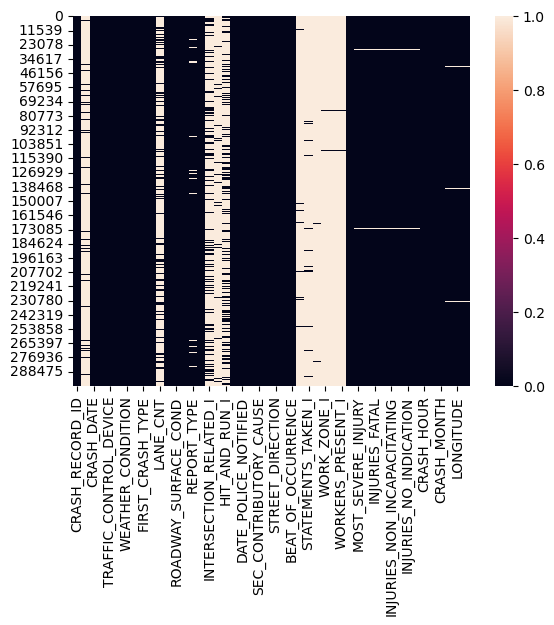

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
# Lets see for the null values 
((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

WORKERS_PRESENT_I                99.856667
DOORING_I                        99.673333
WORK_ZONE_TYPE                   99.583667
WORK_ZONE_I                      99.451333
PHOTOS_TAKEN_I                   98.570333
STATEMENTS_TAKEN_I               97.653000
NOT_RIGHT_OF_WAY_I               95.535667
CRASH_DATE_EST_I                 92.747667
LANE_CNT                         80.157000
INTERSECTION_RELATED_I           77.005667
HIT_AND_RUN_I                    68.487333
REPORT_TYPE                       3.295667
LOCATION                          0.767000
LATITUDE                          0.767000
LONGITUDE                         0.767000
MOST_SEVERE_INJURY                0.216333
INJURIES_UNKNOWN                  0.215000
INJURIES_REPORTED_NOT_EVIDENT     0.215000
INJURIES_INCAPACITATING           0.215000
INJURIES_NO_INDICATION            0.215000
INJURIES_NON_INCAPACITATING       0.215000
INJURIES_FATAL                    0.215000
INJURIES_TOTAL                    0.215000
STREET_NAME

In [9]:
# Lets treat the redundant columns
df.drop(columns=['INJURIES_UNKNOWN','INJURIES_NO_INDICATION','WORKERS_PRESENT_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','STATEMENTS_TAKEN_I',
                 'PHOTOS_TAKEN_I','NOT_RIGHT_OF_WAY_I','CRASH_DATE_EST_I','INTERSECTION_RELATED_I','LANE_CNT','LONGITUDE','LATITUDE','LOCATION'],inplace=True)

In [10]:
df.head()


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,ee0b70ab08d3cbd410c1f3ecb3c3516f8038fe8047a0d6...,06/23/2024 02:27:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,OTHER,STRAIGHT AND LEVEL,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,14,1,6
1,0ec88ab3a8569918911374c88cab3a9d2da1c3bf4a761c...,02/22/2025 03:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3,7,2
2,ed6d242c683189c611132b7a13142e9fd4becaad632125...,10/27/2021 02:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,14,4,10
3,99350589a3541909ced6cd5f09a5b4e786bd1b0c76ad5f...,07-05-2023 17:00,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,17,4,7
4,b03be8f5f610db0a2a3f7002765991da0769940ba93a59...,09-11-2019 08:30,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,8,4,9


In [11]:
((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

HIT_AND_RUN_I                    68.487333
REPORT_TYPE                       3.295667
MOST_SEVERE_INJURY                0.216333
INJURIES_REPORTED_NOT_EVIDENT     0.215000
INJURIES_TOTAL                    0.215000
INJURIES_INCAPACITATING           0.215000
INJURIES_FATAL                    0.215000
INJURIES_NON_INCAPACITATING       0.215000
STREET_NAME                       0.000333
BEAT_OF_OCCURRENCE                0.000333
CRASH_RECORD_ID                   0.000000
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
DATE_POLICE_NOTIFIED              0.000000
DAMAGE                            0.000000
CRASH_TYPE                        0.000000
ROAD_DEFECT                       0.000000
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
FIRST_CRASH

In [12]:
# Lets treat the null values 
df['HIT_AND_RUN_I']=df['HIT_AND_RUN_I'].fillna('Unkown')

In [13]:
for i in ['REPORT_TYPE','MOST_SEVERE_INJURY','BEAT_OF_OCCURRENCE','STREET_NAME']:
    df[i]=df[i].fillna('Not_Known')

In [14]:
for i in ['INJURIES_REPORTED_NOT_EVIDENT','INJURIES_TOTAL','INJURIES_INCAPACITATING','INJURIES_FATAL','INJURIES_NON_INCAPACITATING']:
    df[i]=df[i].fillna(0)

In [15]:
((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

CRASH_RECORD_ID                  0.0
CRASH_DATE                       0.0
POSTED_SPEED_LIMIT               0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ALIGNMENT                        0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
REPORT_TYPE                      0.0
CRASH_TYPE                       0.0
HIT_AND_RUN_I                    0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
SEC_CONTRIBUTORY_CAUSE           0.0
STREET_NO                        0.0
STREET_DIRECTION                 0.0
STREET_NAME                      0.0
BEAT_OF_OCCURRENCE               0.0
NUM_UNITS                        0.0
MOST_SEVERE_INJURY               0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
I

* All the missing values have been treated

In [16]:
# Lets check for the duplicate values in the data 
df.duplicated().sum()

np.int64(0)

In [17]:
# Lets define num_cols and cat_cols
num_cols=df.select_dtypes(np.number).columns
cat_cols=df.select_dtypes(object).columns

In [18]:
num_cols

Index(['POSTED_SPEED_LIMIT', 'STREET_NO', 'NUM_UNITS', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [19]:
cat_cols

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'MOST_SEVERE_INJURY'],
      dtype='object')

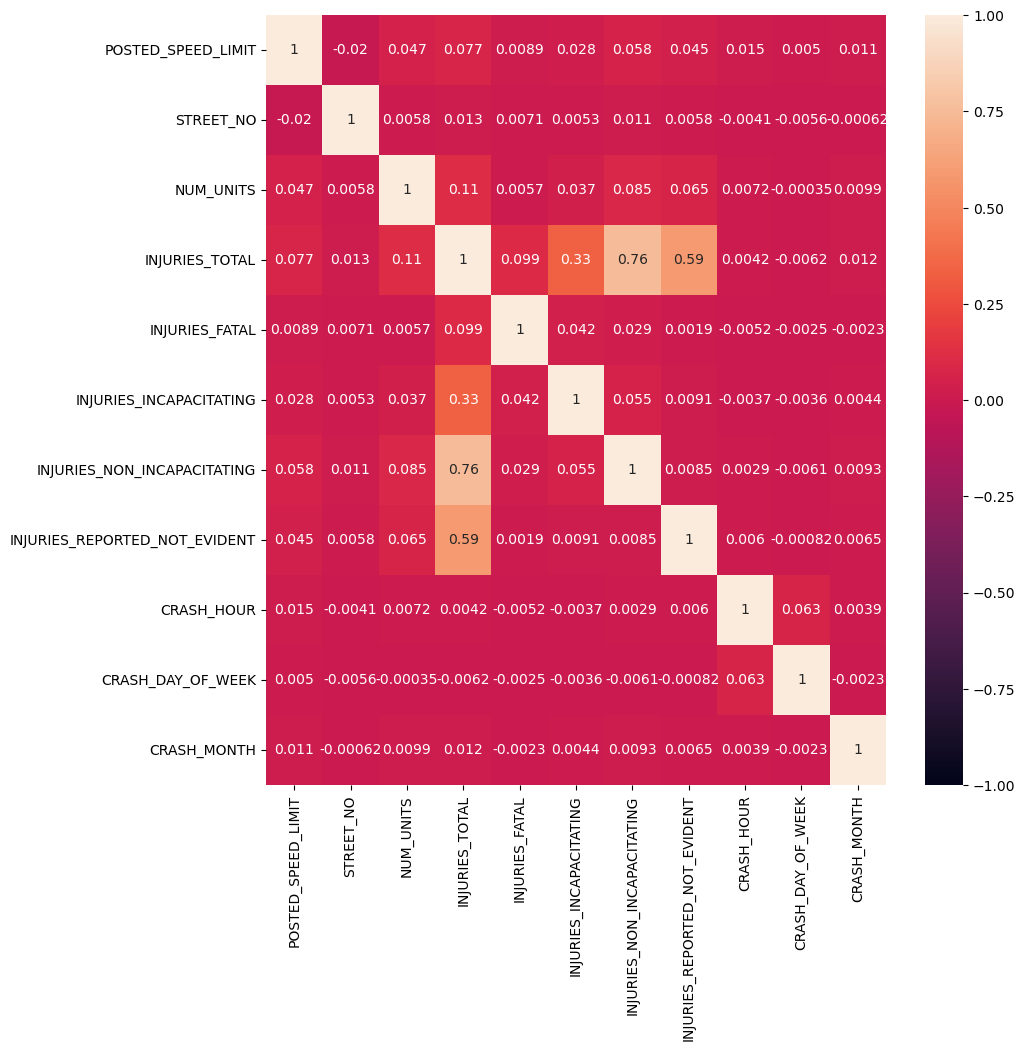

In [20]:
# Lets see the correlation between the numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1)
plt.show()

**Inference**
* We can see that there is a strong correlation between Injuries_Total and Injuries_Non_Incapcitating.
* And we can also see mild correlation between Injuries_Total and Injuries_Incapcitating and Injuries_Reported_Not_Evident.

# Univariate Analysis

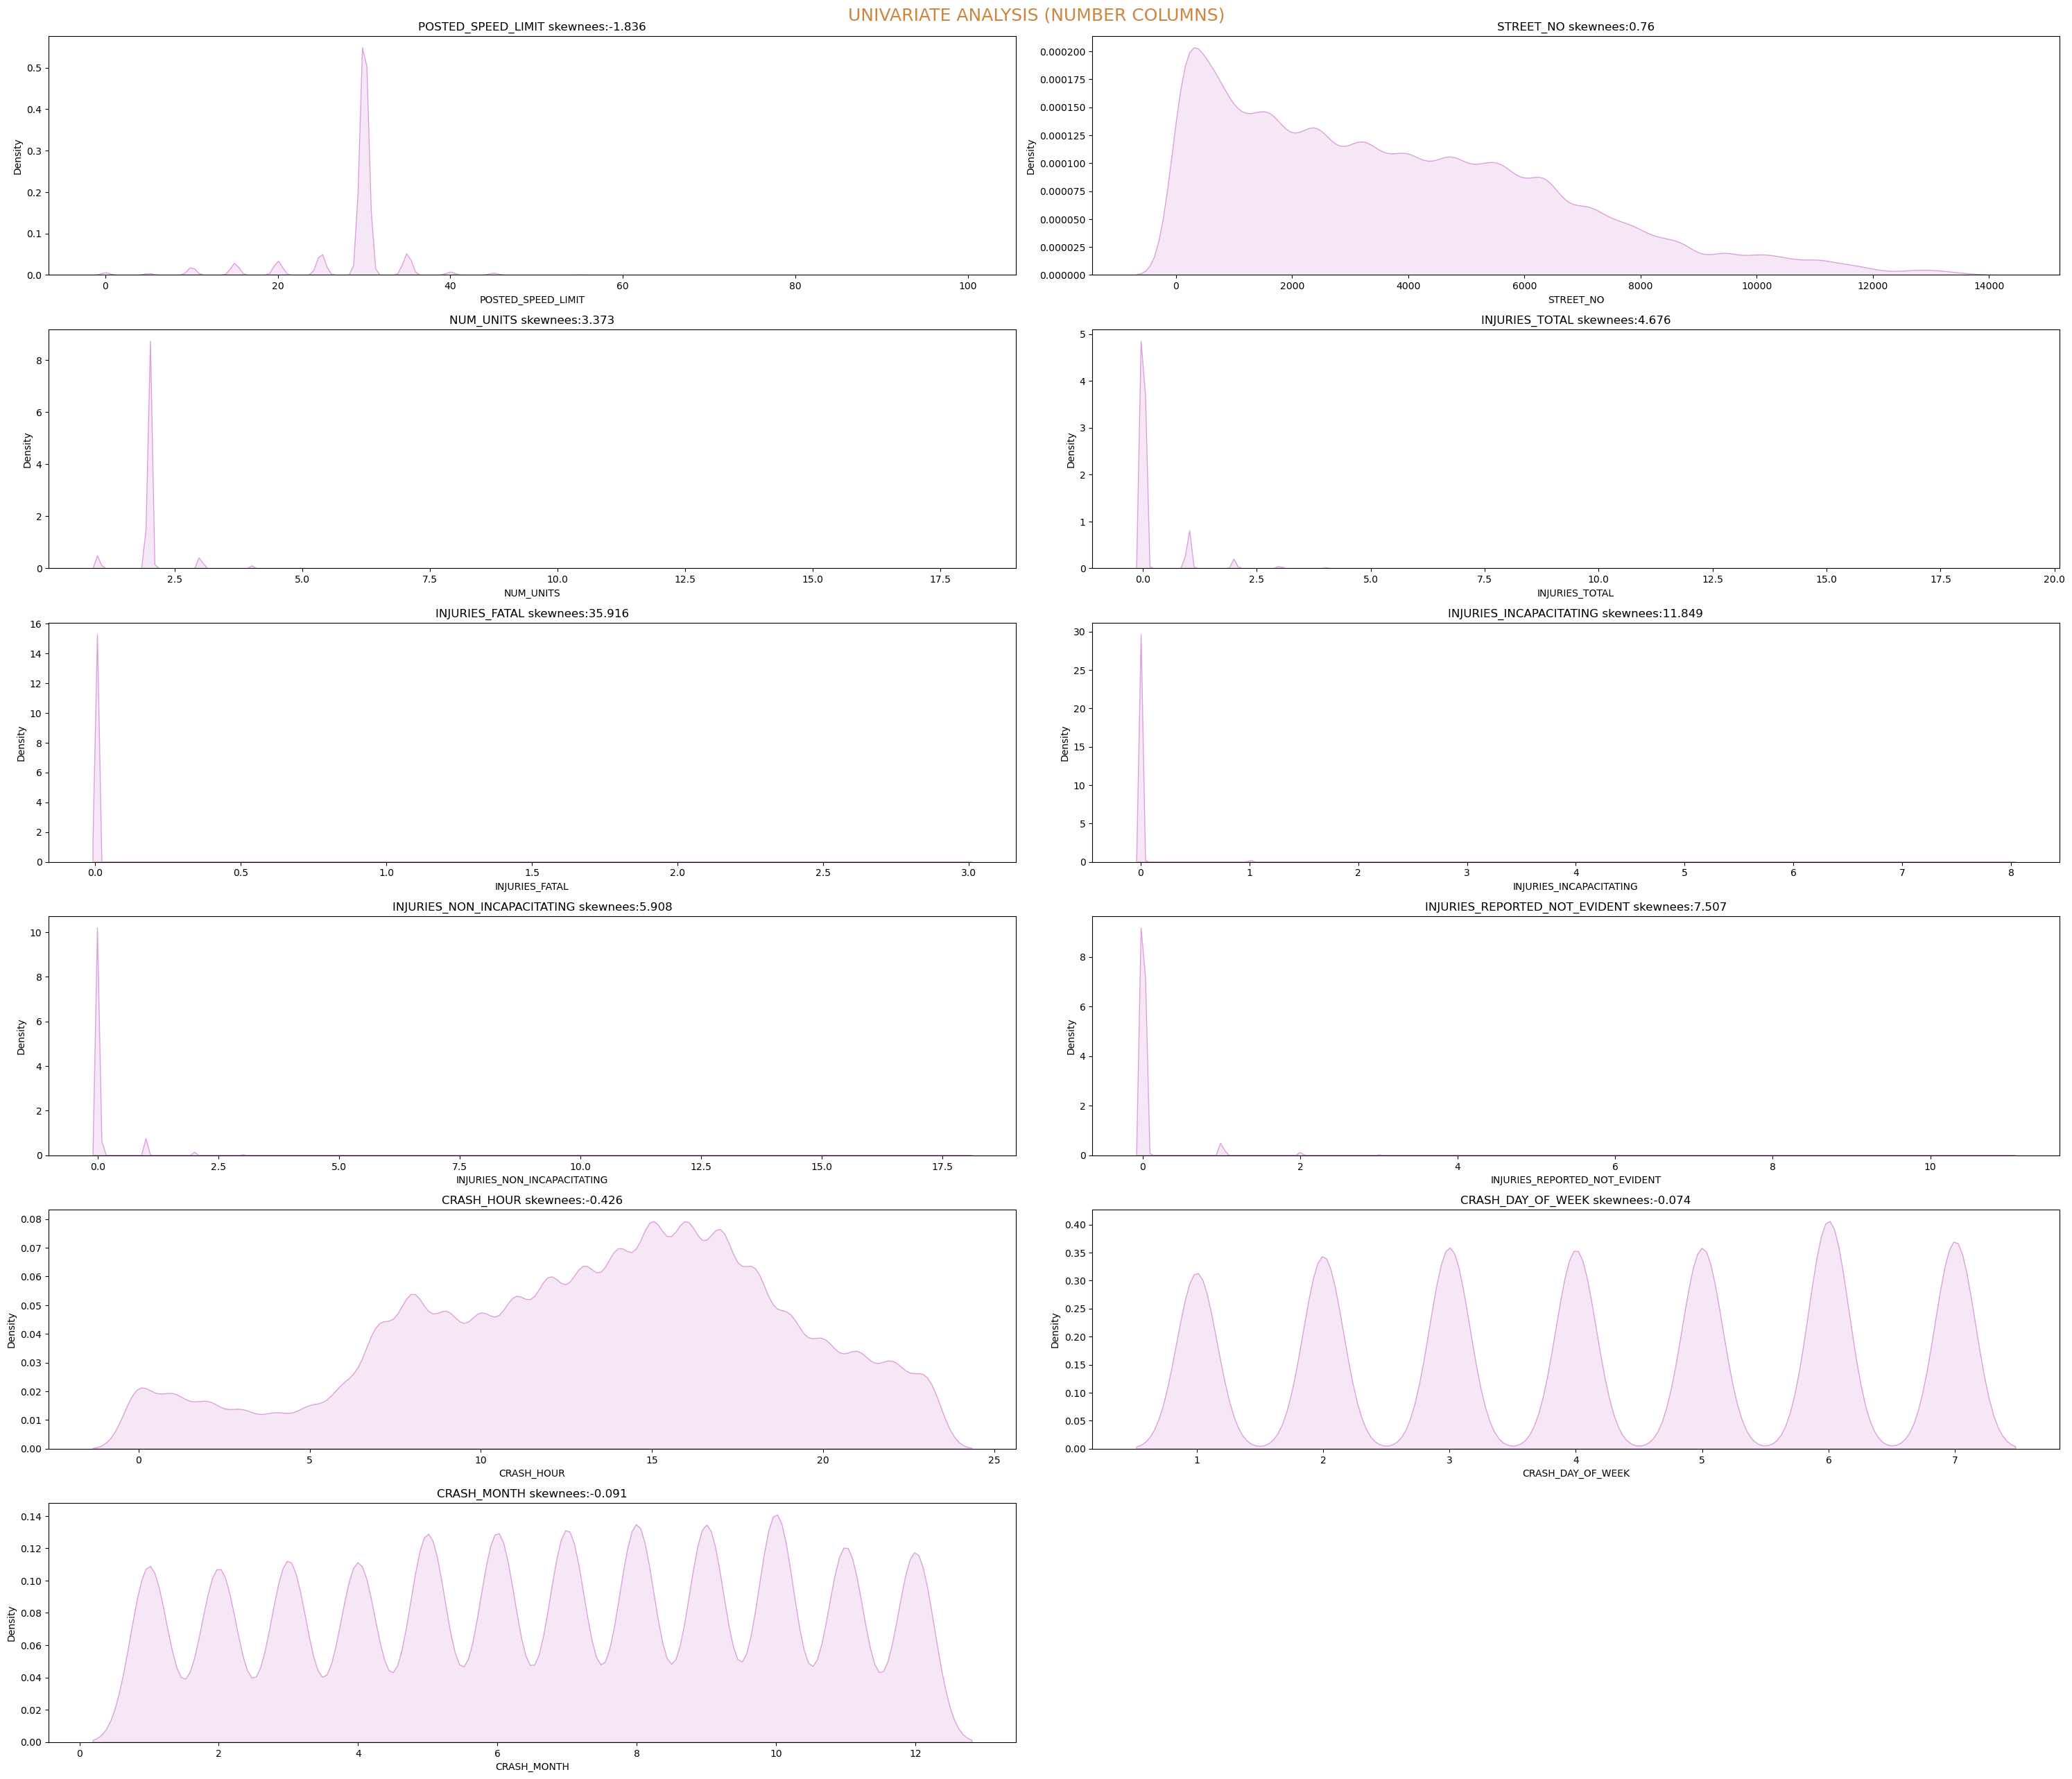

In [21]:
# Lets explore the distribution of numerical columns
t=1
plt.figure(figsize=(30,30))
plt.suptitle('UNIVARIATE ANALYSIS (NUMBER COLUMNS)\n',color='peru',size=18)
for i in num_cols:
    plt.subplot(7,2,t)
    sns.kdeplot(data=df,x=i,fill=True,color='plum')
    skew=df[i].skew()
    plt.title(f'{i} skewnees:{round(skew,3)}')
    t+=1
plt.tight_layout()
plt.show()

**Inference**
* Here in kdeplot we can see that the data is highly skewed.

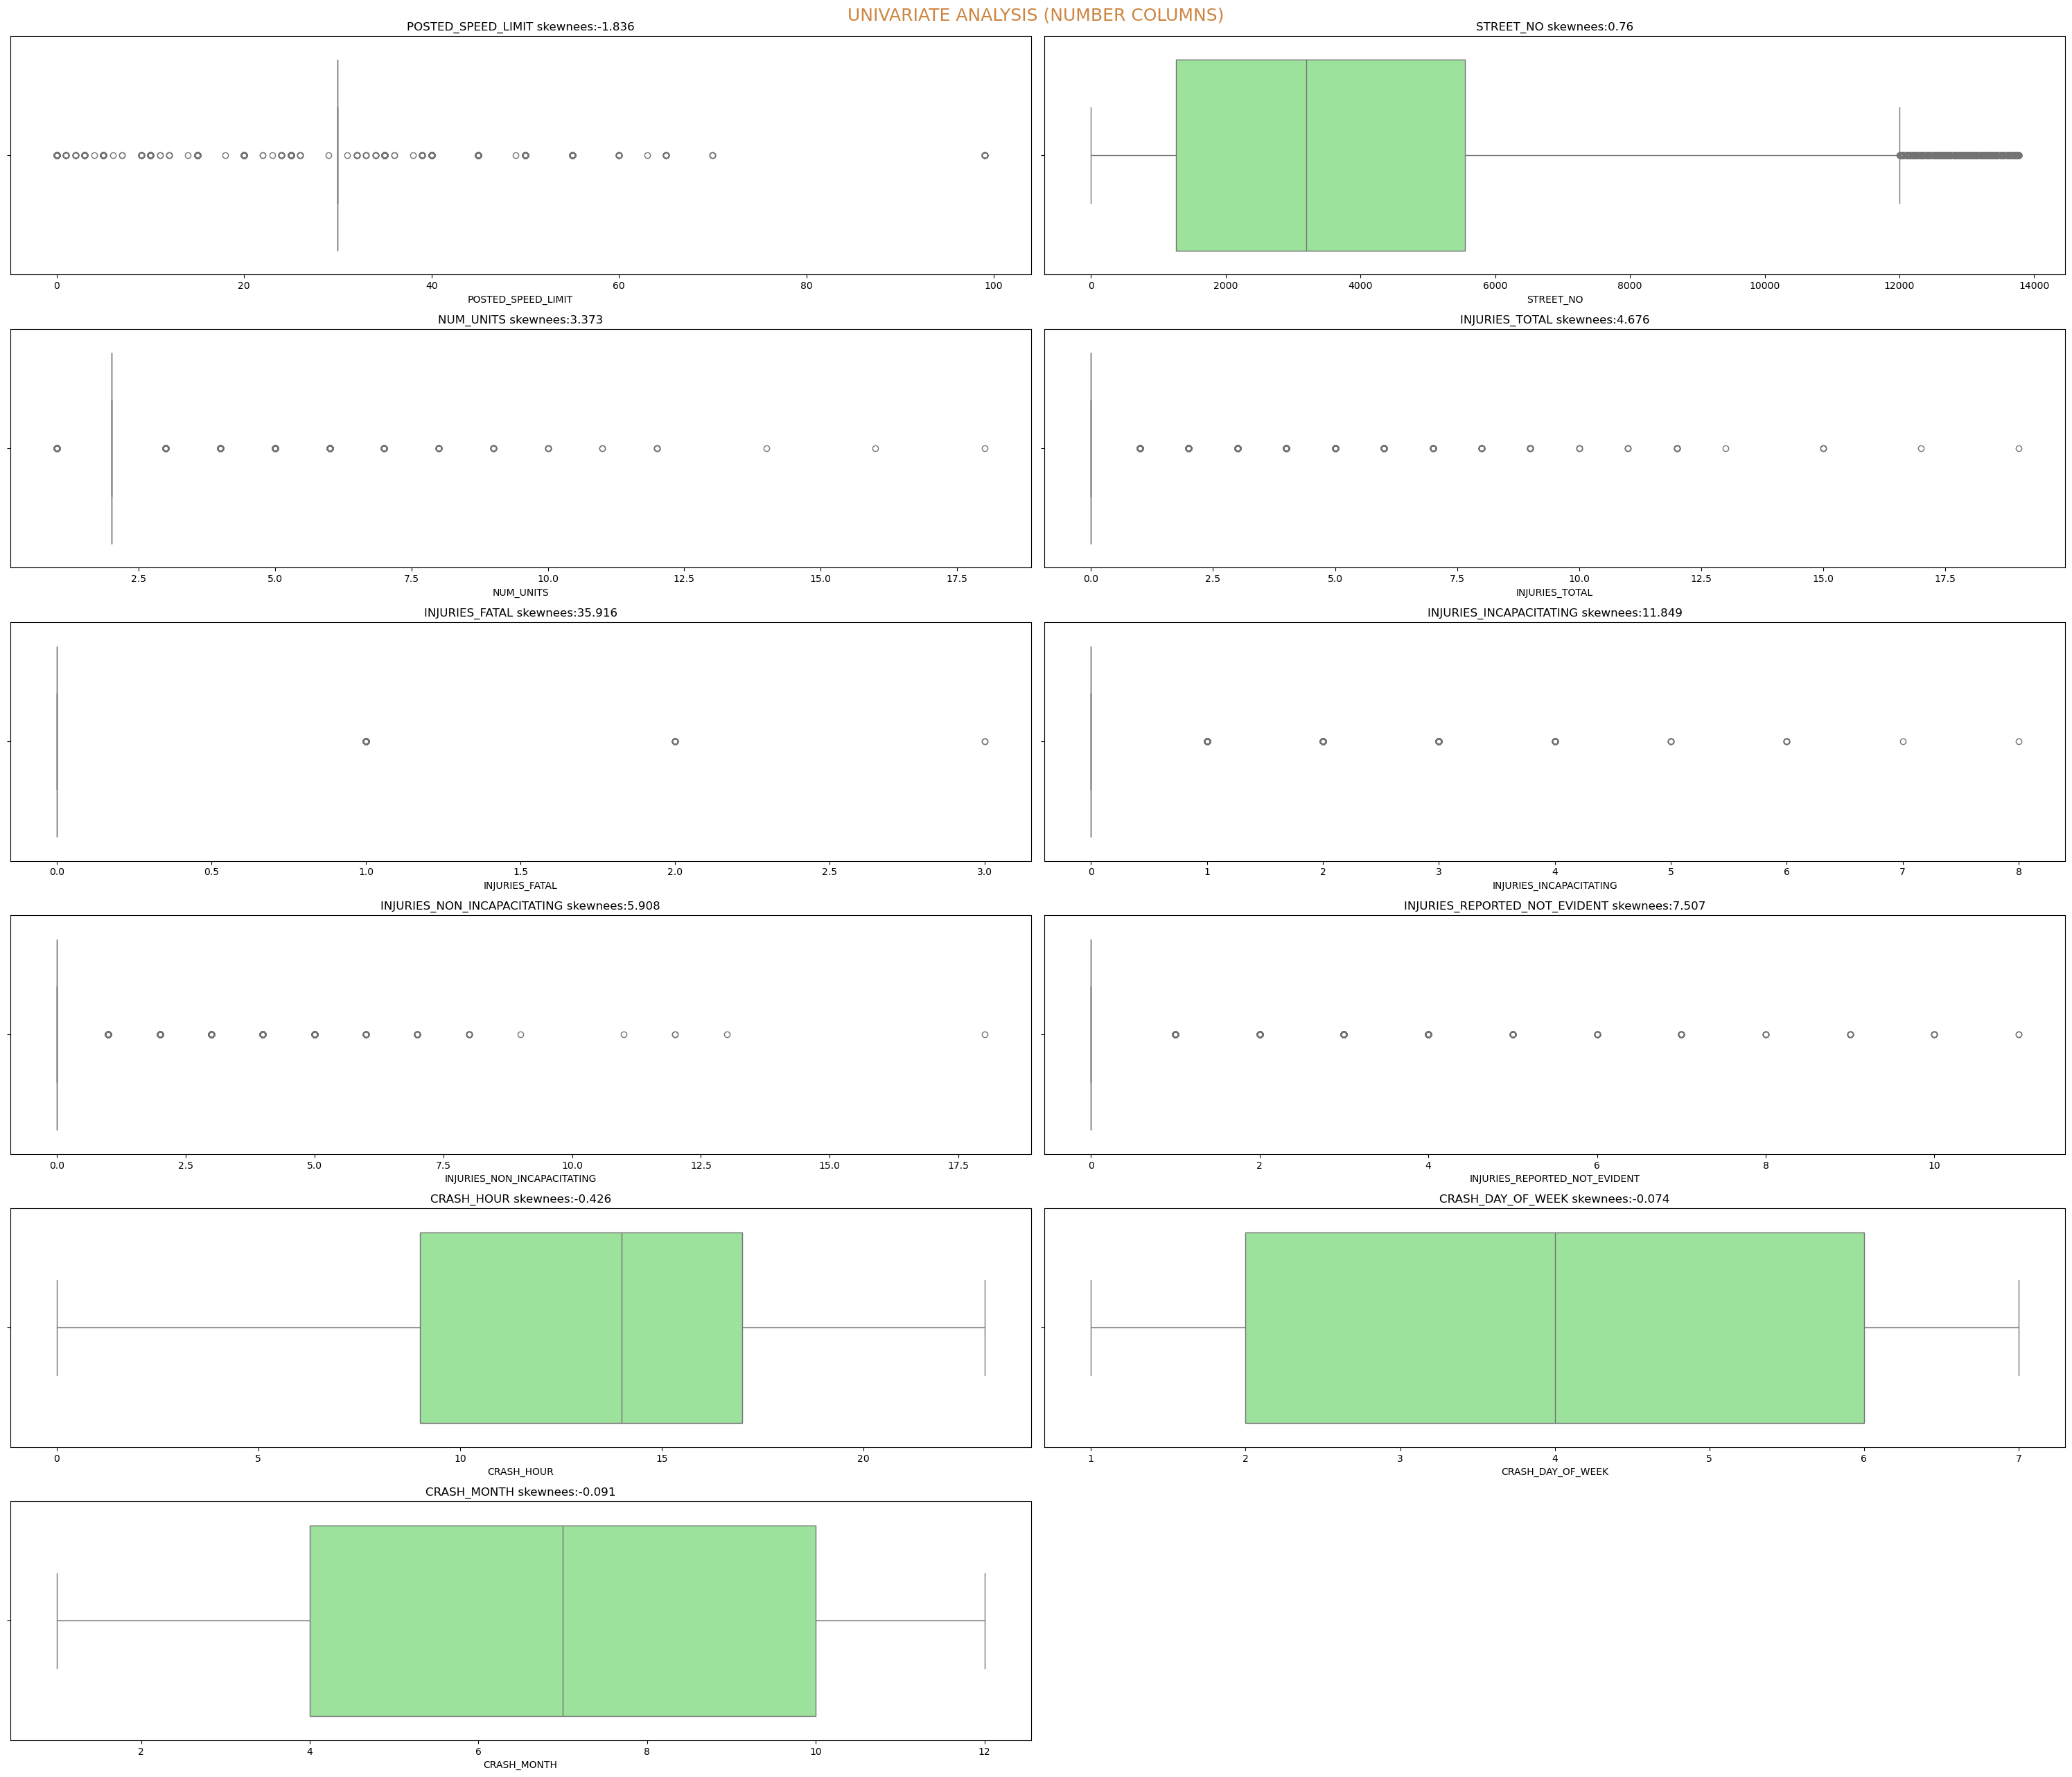

In [22]:
# Boxplot to  visulaize outliers 
t=1
plt.figure(figsize=(30,30))
plt.suptitle('UNIVARIATE ANALYSIS (NUMBER COLUMNS)\n',color='peru',size=18)
for i in num_cols:
    plt.subplot(7,2,t)
    sns.boxplot(data=df,x=i,color='lightgreen')
    skew=df[i].skew()
    plt.title(f'{i} skewnees:{round(skew,3)}')
    t+=1
plt.tight_layout()
plt.show()

**Inference**
* Except Crash_Hours,Crash_Day_of_Week and Crash_Month all the data have outliers which need to be treated.

In [25]:
# Lets treat the outliers in the data 
for i in num_cols:
    q3,q1=df[i].quantile([0.75,0.25])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    df[i]=df[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

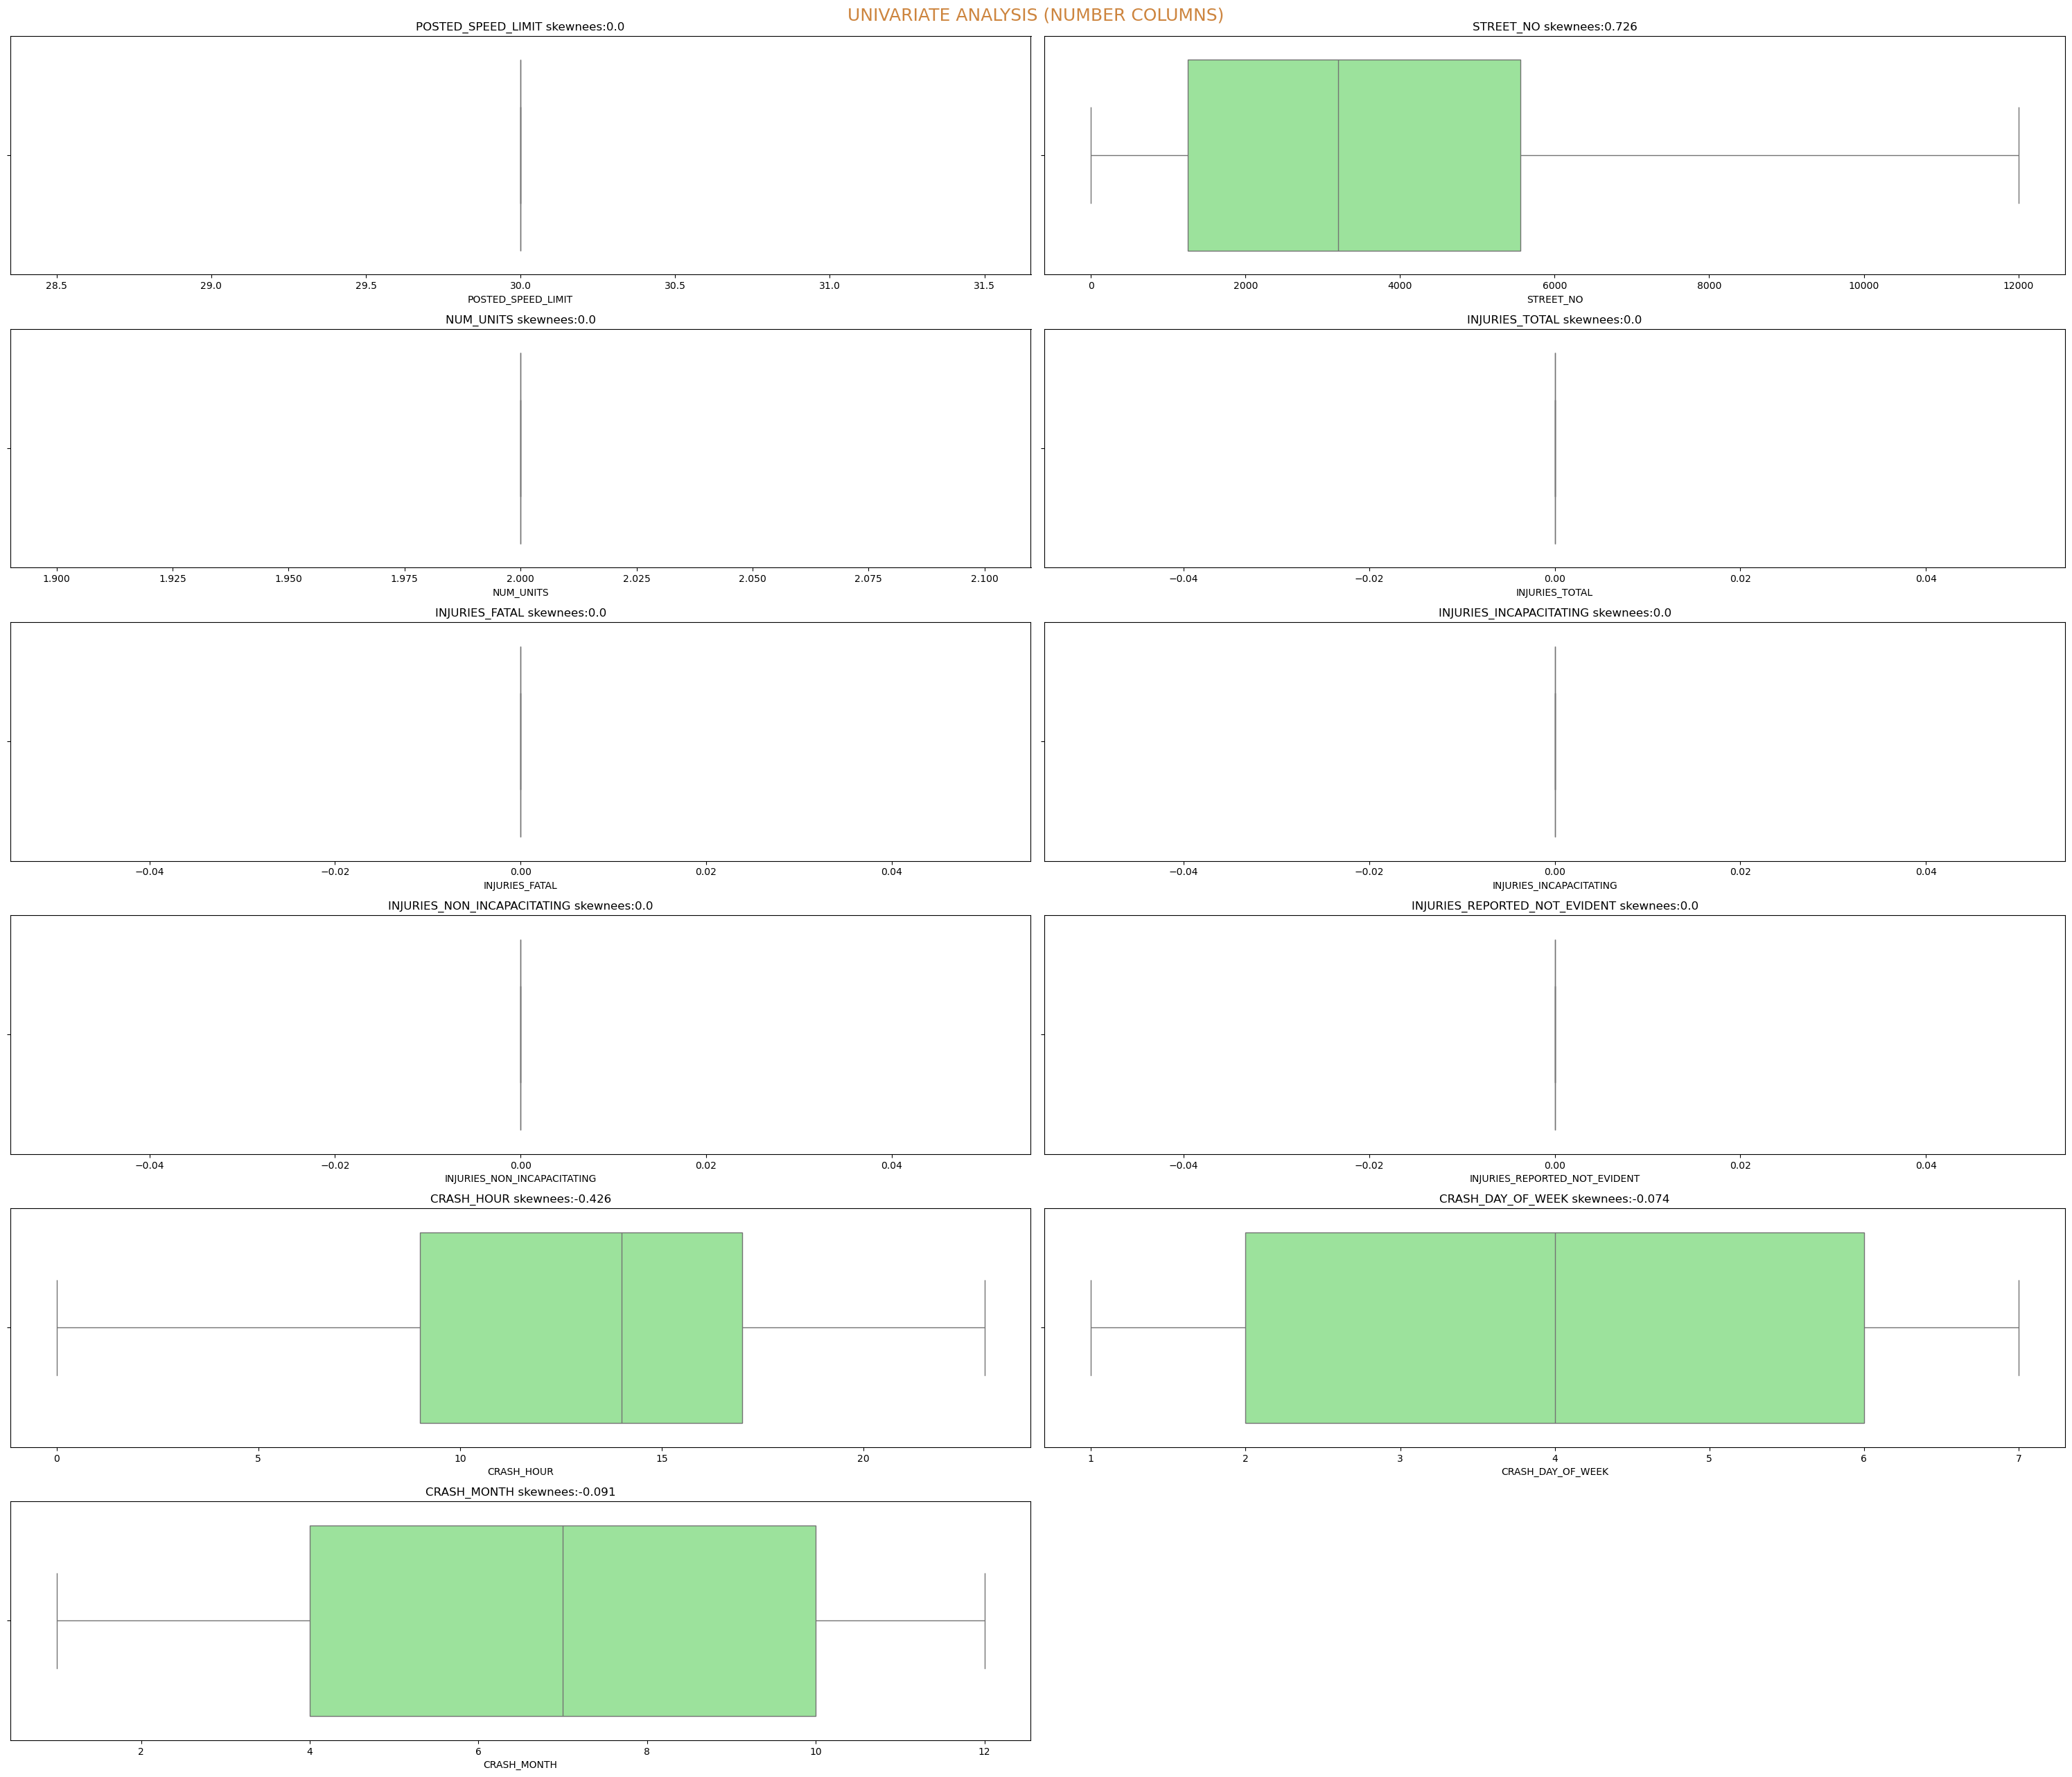

In [26]:
t=1
plt.figure(figsize=(30,30))
plt.suptitle('UNIVARIATE ANALYSIS (NUMBER COLUMNS)\n',color='peru',size=18)
for i in num_cols:
    plt.subplot(7,2,t)
    sns.boxplot(data=df,x=i,color='lightgreen')
    skew=df[i].skew()
    plt.title(f'{i} skewnees:{round(skew,3)}')
    t+=1
plt.tight_layout()
plt.show()

* Outliers have been treated 

# Feature Encoding 